In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Setup proejct
from Utils.ProjectPathsSetup import ProjectPathsSetup
from Environment.PathsParameters import *
from Environment.Parameters import *
ProjectPathsSetup().add_project_paths('./')

## PreTratamento nos dados

Merge e shuffle de todos os bancos de dados

In [68]:
#load Data

fake_news_df = pd.read_csv(TRUE_NEWS_DATASET)
true_news_df = pd.read_csv(FAKE_NEWS_DATASET)

### Pré Avaliação Datasets

In [69]:
fake_news_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


Text(0.5, 1.0, 'Fake news distribution per Subject')

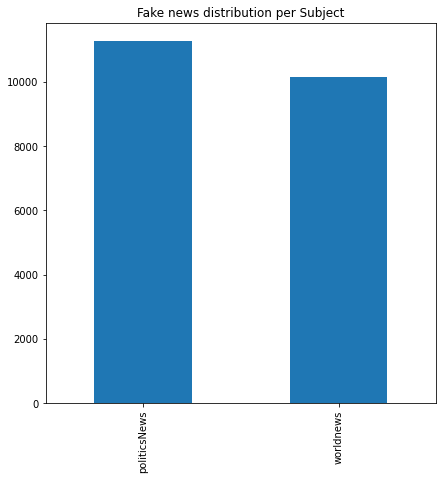

In [70]:
fig = plt.figure(figsize=(7,7))
fake_news_df['subject'].value_counts().plot(kind='bar')
plt.title('Fake news distribution per Subject')

#### True news

In [71]:
true_news_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


Text(0.5, 1.0, 'True news distribution per Subject')

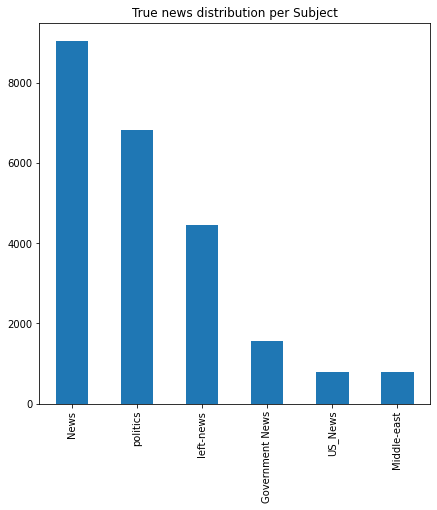

In [72]:
fig = plt.figure(figsize=(7,7))
true_news_df['subject'].value_counts().plot(kind='bar')
plt.title('True news distribution per Subject')

Comparando a distribuição de assunto entre as fakenews com as True news percebe-se que as fakenews são focadas em dois principais assutos equanto as notícias verdadeira são mais diversas. Será então que se queremos construir um bom detector de fake news não deveriamos então focar nesses dois assuntos? Ou então o assunto não seria relevante?

Vamos considerar só relevante o titulo e o texto relativo as noticias

#### Jutando os dados 

In [73]:
from Utils.Concatenator import Cocatenator

In [74]:
## merge
true_news_df['label'] = 0
true_news_df_rev= true_news_df[['title','text','label']].copy()

fake_news_df['label'] = 1
fake_news_df_rev= fake_news_df[['title','text','label']].copy()



news_df = Cocatenator().concatenate(true_news_df_rev, fake_news_df_rev)



## Data Preprocessing

O preprecessamento de dados basicamente foi realizado considerando 2 etapas. A etapa de processamento de texto, e a etapa de codificação do texto em uma forma de vetor numérico.
Para etapa de  processamento de texto fizemoso processamento de texto que usualmente se faz dados de texto: 

- Remoção de caracteres especiais
- Tokenização
- Eliminação das "stopwords"
- Steamming (normalização dos tokens)

Feito isso, utilizamos os tokens normalizados para realizar  as codificações. Basicamente foram dois tipos:

- embedding doc
- word2vector

E assim se fez respectivamente para os títutlos das notícias e os textos

Devido ao fato dos dados a serem processados requerem um tempo de processamento significativo, decidiu-se separar o preprocessamento através dos scripts `transform_text_to_embeddingDoc.py` e `transform_text_to_w2v.py` presentes no módulo *"PreProcessing". Os scripts fazem todo o préprocessamento necessário aos dados e os salvam em arquivos .csv, aos quais usaremos para dar processeguimento a construção de modelos.

O logs desses script podem ser vistos abaixo:

In [75]:
with open(LOGS_PATH + 'preprocessing_data_to_embedding_doc.txt', 'r') as f:
    logs_emb_doc = f.read()

print(logs_emb_doc)

2023-06-28 08:32:31.204720: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2023-06-28 08:32:31.204855: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Inicializing Preprocessing setup...
Download 'punkt' NLTK package

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Download nltk 'stopwords' package

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!
Setup  done!

*********************************************************************************

In [77]:
#load preprocessed data

#embedding doc
news_embedding_doc = np.loadtxt(PREPROCESSED_DATA_PATH +'embedding_doc_word_news_arrays.csv', delimiter= ',')


#word2vec
news_w2v_encoded = np.loadtxt(PREPROCESSED_DATA_PATH +'w2v_word_news_arrays.csv', delimiter= ',')


## Modelagem

In [4]:
from Utils.JSONHandler import JSONHandler
from DLArchitectures.SimpleDense import SimpleDense
from DLArchitectures.EmbeddingLSTM import EmbeddingLSTM
from Utils.GraphicPlotter import GraphicPlotter
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [79]:
# Set Seed to guarantee reprodubility
np.random.seed(SEED)
tf.random.set_seed(SEED)


# Instantiate Plotter

grapPlotter = GraphicPlotter()

In [80]:

news_class = news_df['label']

# split train/test text and title embedded doc
X_emb_doc_train, X_emb_doc_test, y_emb_doc_train , y_emb_doc_test = train_test_split(news_embedding_doc, news_class, train_size=0.8, random_state=SEED)


#split train/test text and title  word vectors

X_w2v_train, X_w2v_test, y_w2v_train , y_w2v_test = train_test_split(news_w2v_encoded, news_class, train_size=0.8, random_state=SEED)



In [13]:
#load Preprocessing Parms
jsonHandler = JSONHandler()
vocab_params = jsonHandler.read_json(PREPROCESSED_DATA_PARAMS_PATH + 'vocab_params.json' )
word_idxs = jsonHandler.read_json(PREPROCESSED_DATA_PARAMS_PATH + 'word_indexes.json' )
word_idxs = [ (el[0], el[1]) for el in word_idxs['word_index_news']]

### Modeling for text

#### With embedding doc

##### EmbeddingLTSM

In [82]:
#  the model for the title
text_embedding_model_embdoc = EmbeddingLSTM(VO_SIZE_TEXT, EMBEDDING_TEXT_SIZE,100).get_model()
print(text_embedding_model_embdoc.summary())

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 title_embedding (Embedding)  (None, None, 100)        100000    
                                                                 
 lstm_4 (LSTM)               (None, 100)               80400     
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 180,501
Trainable params: 180,501
Non-trainable params: 0
_________________________________________________________________
None


In [83]:
history_title = text_embedding_model_embdoc.fit(X_emb_doc_train, y_emb_doc_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)

Epoch 1/40
898/898 [==============================] - 32s 31ms/step - loss: 0.6926 - accuracy: 0.5176 - val_loss: 0.6920 - val_accuracy: 0.5255
Epoch 2/40
898/898 [==============================] - 26s 29ms/step - loss: 0.6914 - accuracy: 0.5264 - val_loss: 0.6923 - val_accuracy: 0.5207
Epoch 3/40
898/898 [==============================] - 26s 29ms/step - loss: 0.6876 - accuracy: 0.5416 - val_loss: 0.6950 - val_accuracy: 0.5084
Epoch 4/40
898/898 [==============================] - 27s 30ms/step - loss: 0.6827 - accuracy: 0.5589 - val_loss: 0.6997 - val_accuracy: 0.5223
Epoch 5/40
898/898 [==============================] - 25s 28ms/step - loss: 0.6763 - accuracy: 0.5709 - val_loss: 0.7030 - val_accuracy: 0.5106
Epoch 6/40
898/898 [==============================] - 26s 29ms/step - loss: 0.6675 - accuracy: 0.5856 - val_loss: 0.7124 - val_accuracy: 0.5103
Epoch 7/40
898/898 [==============================] - 25s 28ms/step - loss: 0.6552 - accuracy: 0.6036 - val_loss: 0.7171 - val_accuracy:

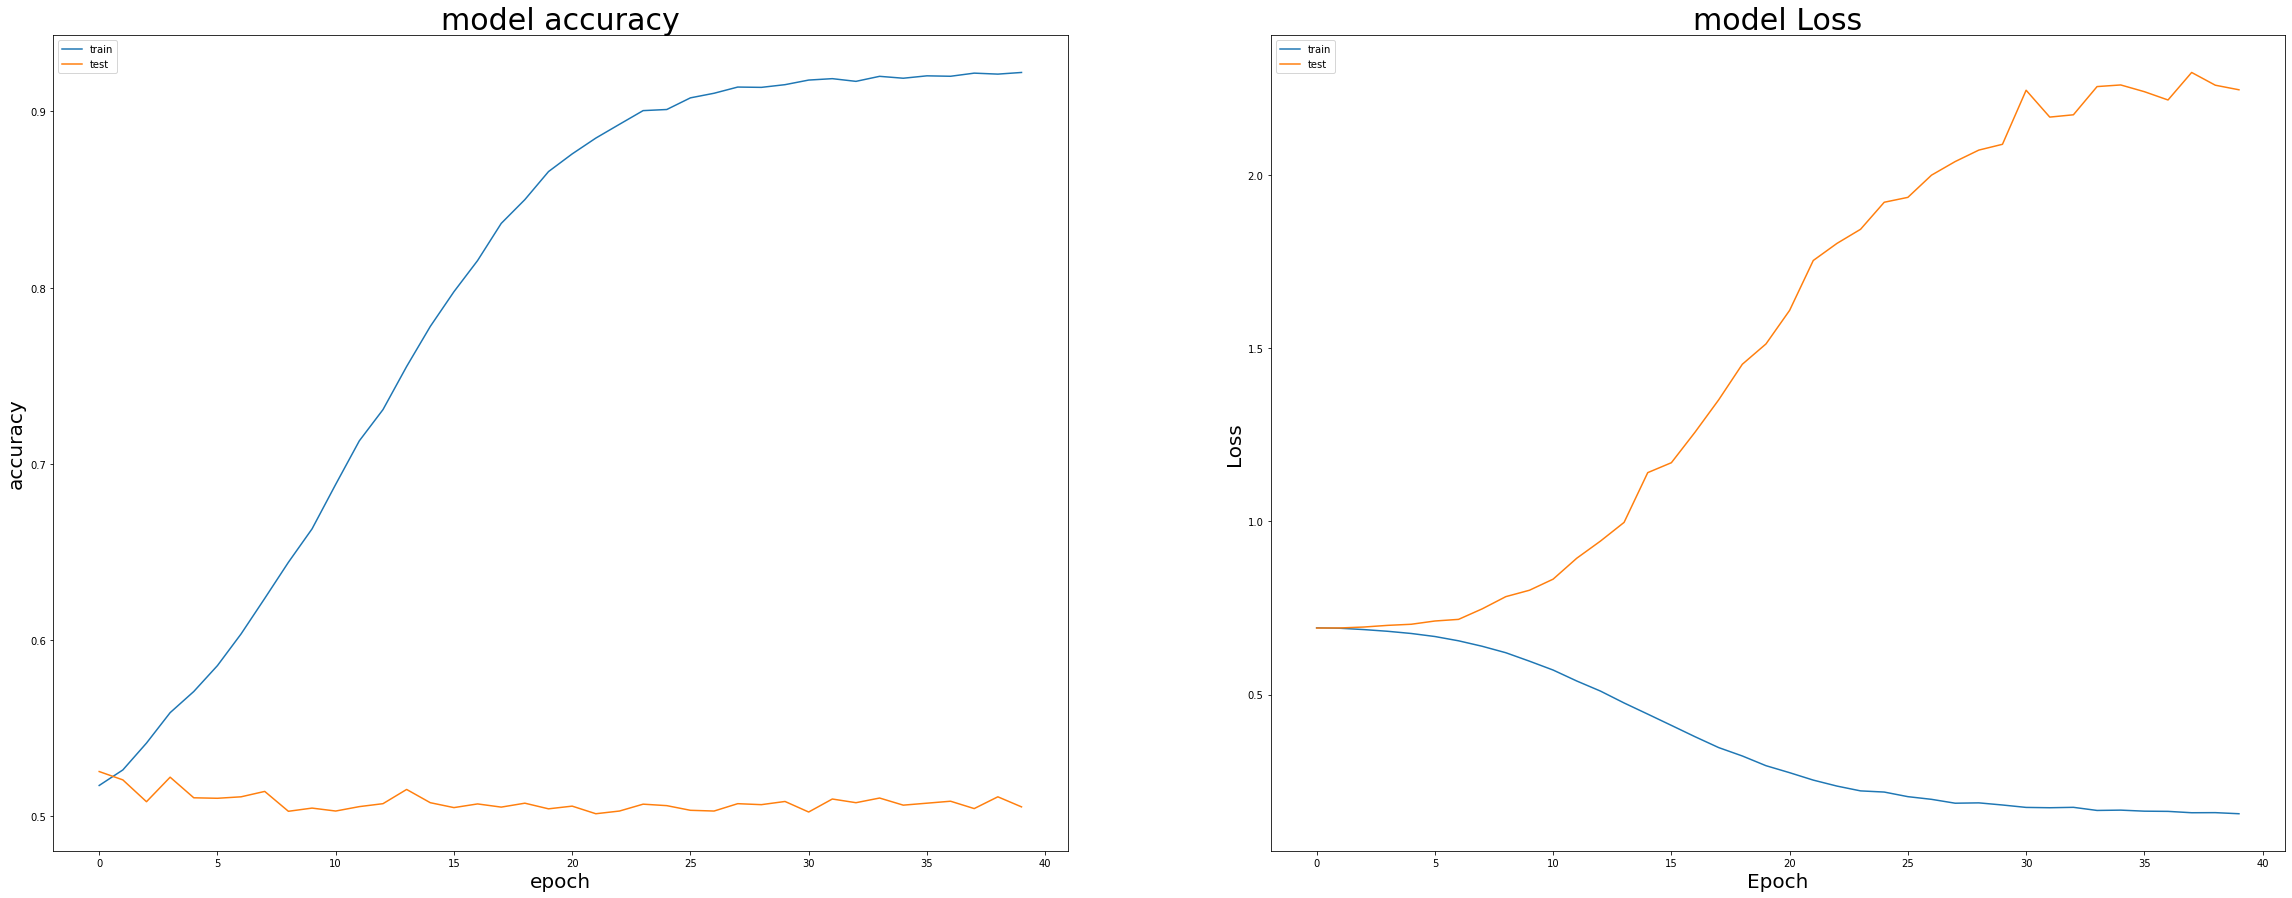

In [84]:
grapPlotter.plot_train_history(history_title)

#### with simpler model

In [85]:


text_embedding_model_embdoc_simple_dense = SimpleDense(20).get_model()

title_embedding_model_embdoc_simple_dense_hist = text_embedding_model_embdoc_simple_dense.fit(X_emb_doc_train, y_emb_doc_train, validation_split=0.2, epochs=40, batch_size=32, verbose=1)

Epoch 1/40
898/898 [==============================] - 4s 3ms/step - loss: 7.3942 - accuracy: 0.5065 - val_loss: 2.1193 - val_accuracy: 0.4999
Epoch 2/40
898/898 [==============================] - 2s 3ms/step - loss: 3.6259 - accuracy: 0.5063 - val_loss: 3.8212 - val_accuracy: 0.5241
Epoch 3/40
898/898 [==============================] - 2s 2ms/step - loss: 3.3279 - accuracy: 0.5022 - val_loss: 2.6553 - val_accuracy: 0.5266
Epoch 4/40
898/898 [==============================] - 2s 2ms/step - loss: 3.1407 - accuracy: 0.5012 - val_loss: 5.2862 - val_accuracy: 0.4747
Epoch 5/40
898/898 [==============================] - 3s 3ms/step - loss: 3.0037 - accuracy: 0.4983 - val_loss: 1.1966 - val_accuracy: 0.4873
Epoch 6/40
898/898 [==============================] - 4s 4ms/step - loss: 2.8359 - accuracy: 0.4995 - val_loss: 3.7262 - val_accuracy: 0.4754
Epoch 7/40
898/898 [==============================] - 3s 3ms/step - loss: 2.6764 - accuracy: 0.5003 - val_loss: 2.5348 - val_accuracy: 0.4738
Epoch 

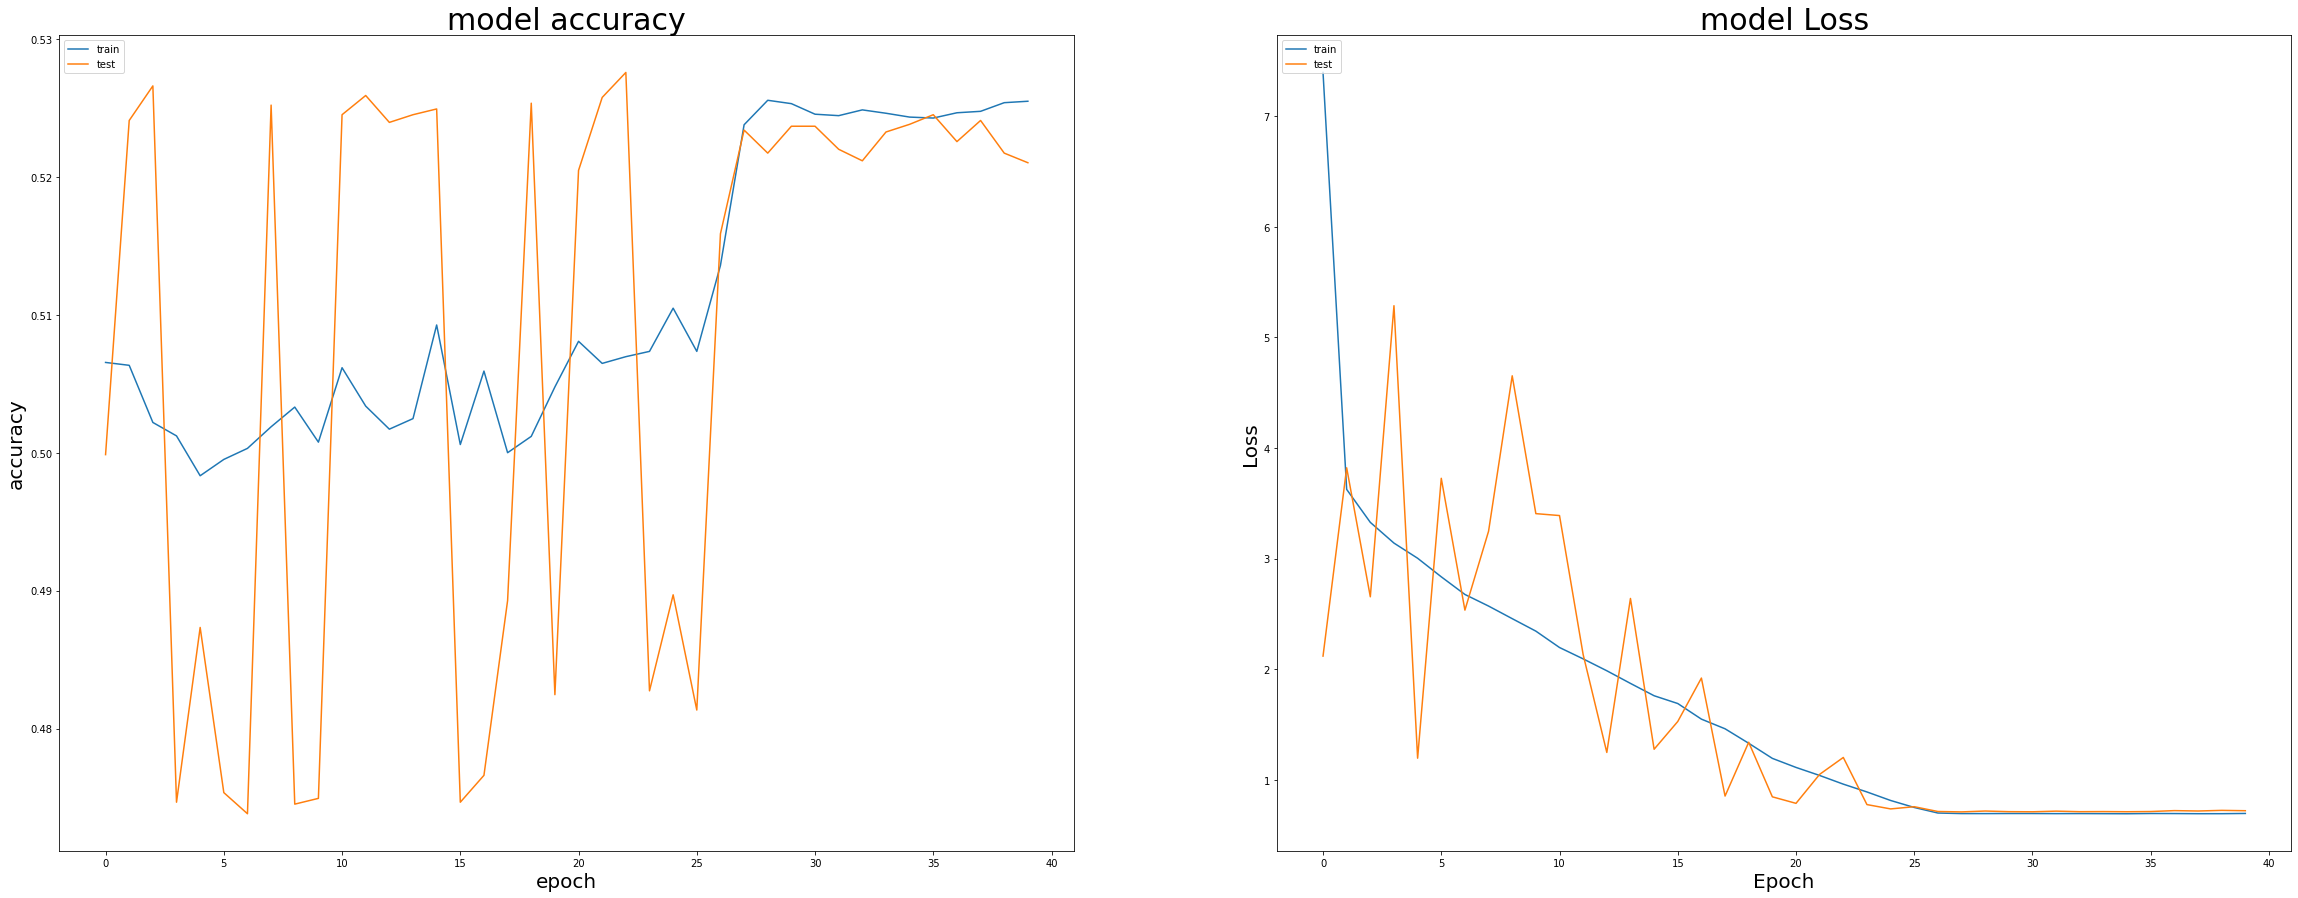

In [86]:
grapPlotter.plot_train_history(title_embedding_model_embdoc_simple_dense_hist)

### Vectorizer codification

In [87]:

model_text_w2v_emb_lstm =  EmbeddingLSTM(vocab_params['news_vocab_size'], EMBEDDING__TITLE_SIZE, 100).get_model()
print(model_text_w2v_emb_lstm.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 title_embedding (Embedding)  (None, None, 50)         1389900   
                                                                 
 lstm_5 (LSTM)               (None, 100)               60400     
                                                                 
 dense_15 (Dense)            (None, 1)                 101       
                                                                 
Total params: 1,450,401
Trainable params: 1,450,401
Non-trainable params: 0
_________________________________________________________________
None


In [88]:

text_w2v_emb_lstm_history = model_text_w2v_emb_lstm.fit(X_w2v_train, y_w2v_train, validation_split=0.2 ,epochs=40, batch_size=32, verbose=1)

Epoch 1/40


898/898 [==============================] - 85s 91ms/step - loss: 0.6924 - accuracy: 0.5216 - val_loss: 0.6918 - val_accuracy: 0.5277
Epoch 2/40
898/898 [==============================] - 67s 74ms/step - loss: 0.6923 - accuracy: 0.5206 - val_loss: 0.6917 - val_accuracy: 0.5260
Epoch 3/40
898/898 [==============================] - 75s 84ms/step - loss: 0.6922 - accuracy: 0.5213 - val_loss: 0.6921 - val_accuracy: 0.5259
Epoch 4/40
898/898 [==============================] - 68s 76ms/step - loss: 0.6922 - accuracy: 0.5218 - val_loss: 0.6923 - val_accuracy: 0.5259
Epoch 5/40
898/898 [==============================] - 72s 80ms/step - loss: 0.6922 - accuracy: 0.5212 - val_loss: 0.6921 - val_accuracy: 0.5259
Epoch 6/40
898/898 [==============================] - 75s 83ms/step - loss: 0.6922 - accuracy: 0.5216 - val_loss: 0.6919 - val_accuracy: 0.5277
Epoch 7/40
898/898 [==============================] - 67s 75ms/step - loss: 0.6921 - accuracy: 0.5209 - val_loss: 0.6919 - val_accuracy: 0.5217
Epo

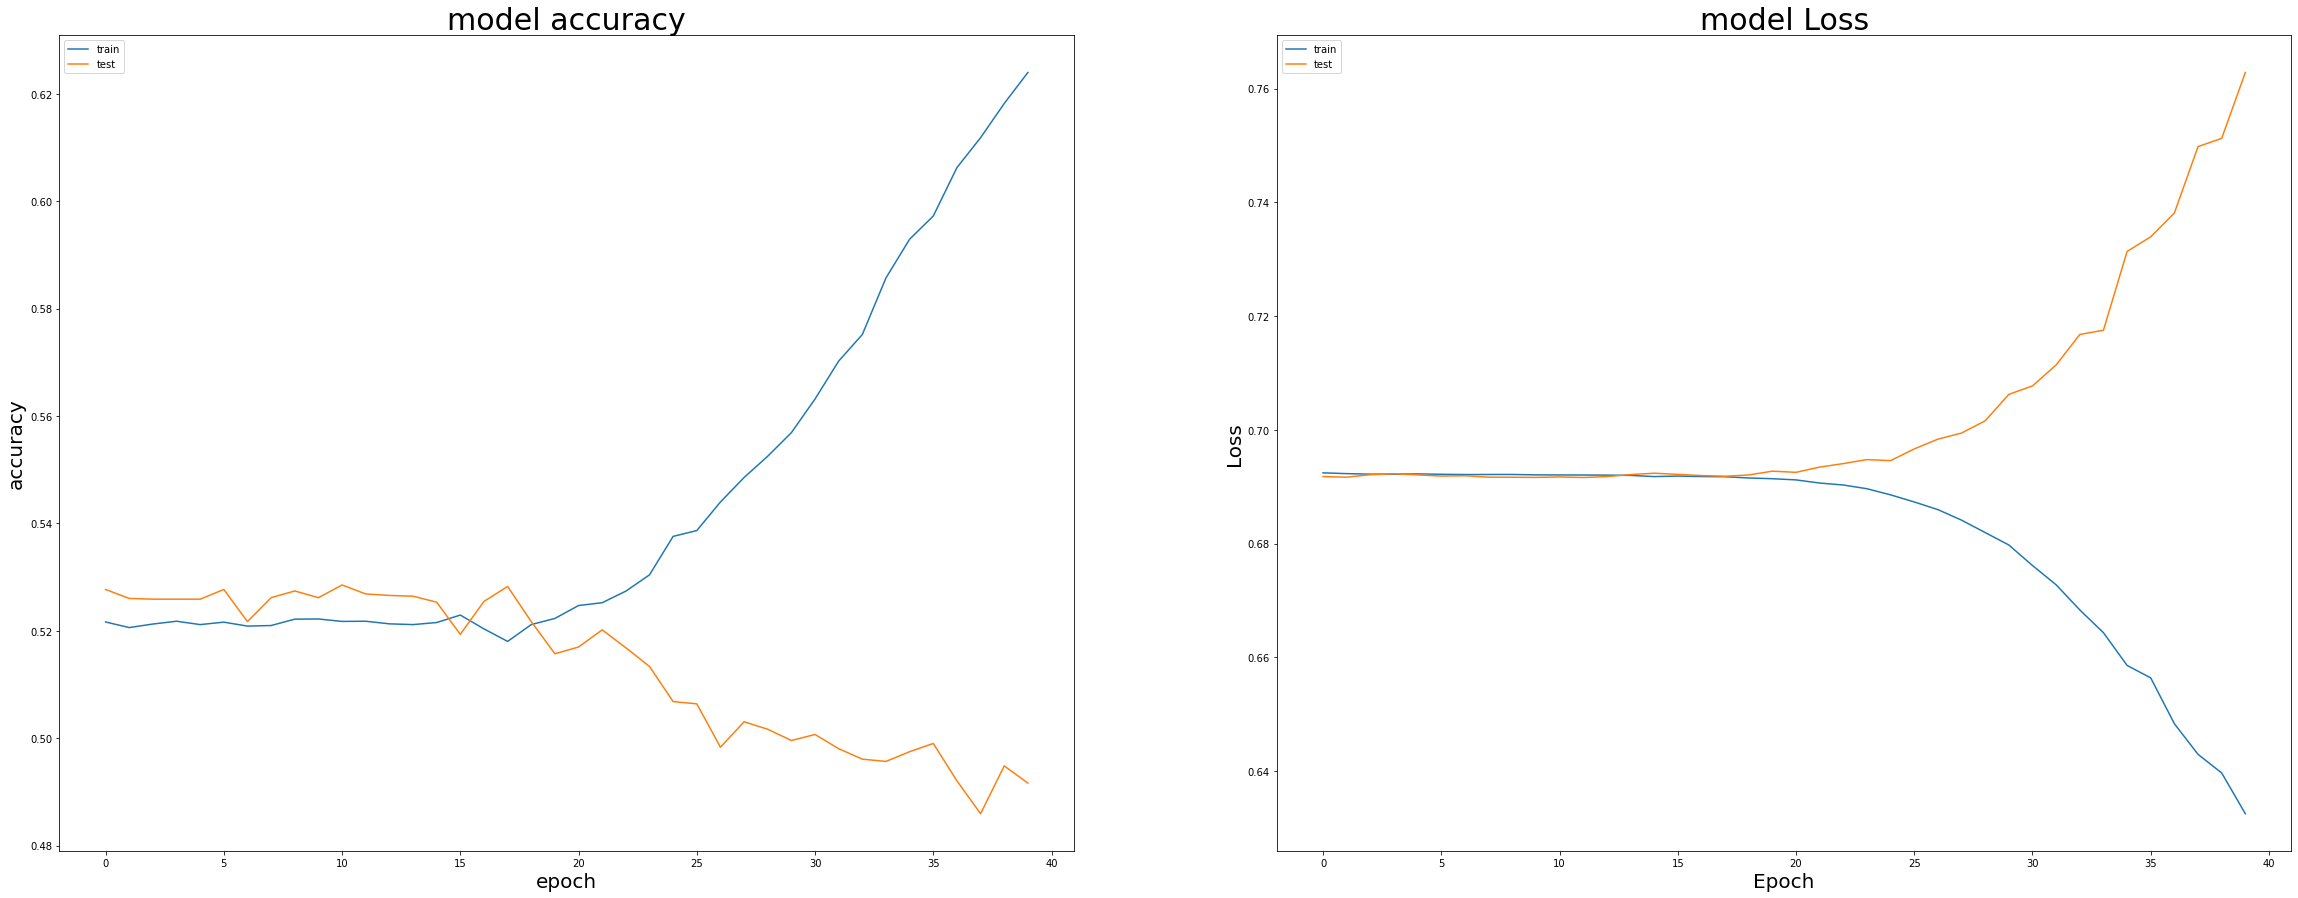

In [89]:
grapPlotter.plot_train_history(text_w2v_emb_lstm_history)

### Modelo sem recorrência

In [90]:
model_w2v_simple_dense_text = SimpleDense(TEXT_VEC_DIM).get_model()

model_w2v_simple_dense_text_history = model_w2v_simple_dense_text.fit(X_w2v_train, y_w2v_train, validation_split=0.2 ,epochs=40, batch_size=32, verbose=1)

Epoch 1/40
898/898 [==============================] - 7s 3ms/step - loss: 2185.5613 - accuracy: 0.5021 - val_loss: 2558.4182 - val_accuracy: 0.4741
Epoch 2/40
898/898 [==============================] - 2s 2ms/step - loss: 1670.1073 - accuracy: 0.5049 - val_loss: 1632.8588 - val_accuracy: 0.4741
Epoch 3/40
898/898 [==============================] - 2s 2ms/step - loss: 1344.8693 - accuracy: 0.4965 - val_loss: 1678.2592 - val_accuracy: 0.4741
Epoch 4/40
898/898 [==============================] - 2s 2ms/step - loss: 1060.2917 - accuracy: 0.5012 - val_loss: 728.0937 - val_accuracy: 0.5259
Epoch 5/40
898/898 [==============================] - 2s 2ms/step - loss: 833.9548 - accuracy: 0.5009 - val_loss: 1213.9998 - val_accuracy: 0.5259
Epoch 6/40
898/898 [==============================] - 2s 3ms/step - loss: 698.8176 - accuracy: 0.5037 - val_loss: 328.3032 - val_accuracy: 0.4741
Epoch 7/40
898/898 [==============================] - 2s 2ms/step - loss: 581.8401 - accuracy: 0.5040 - val_loss: 34

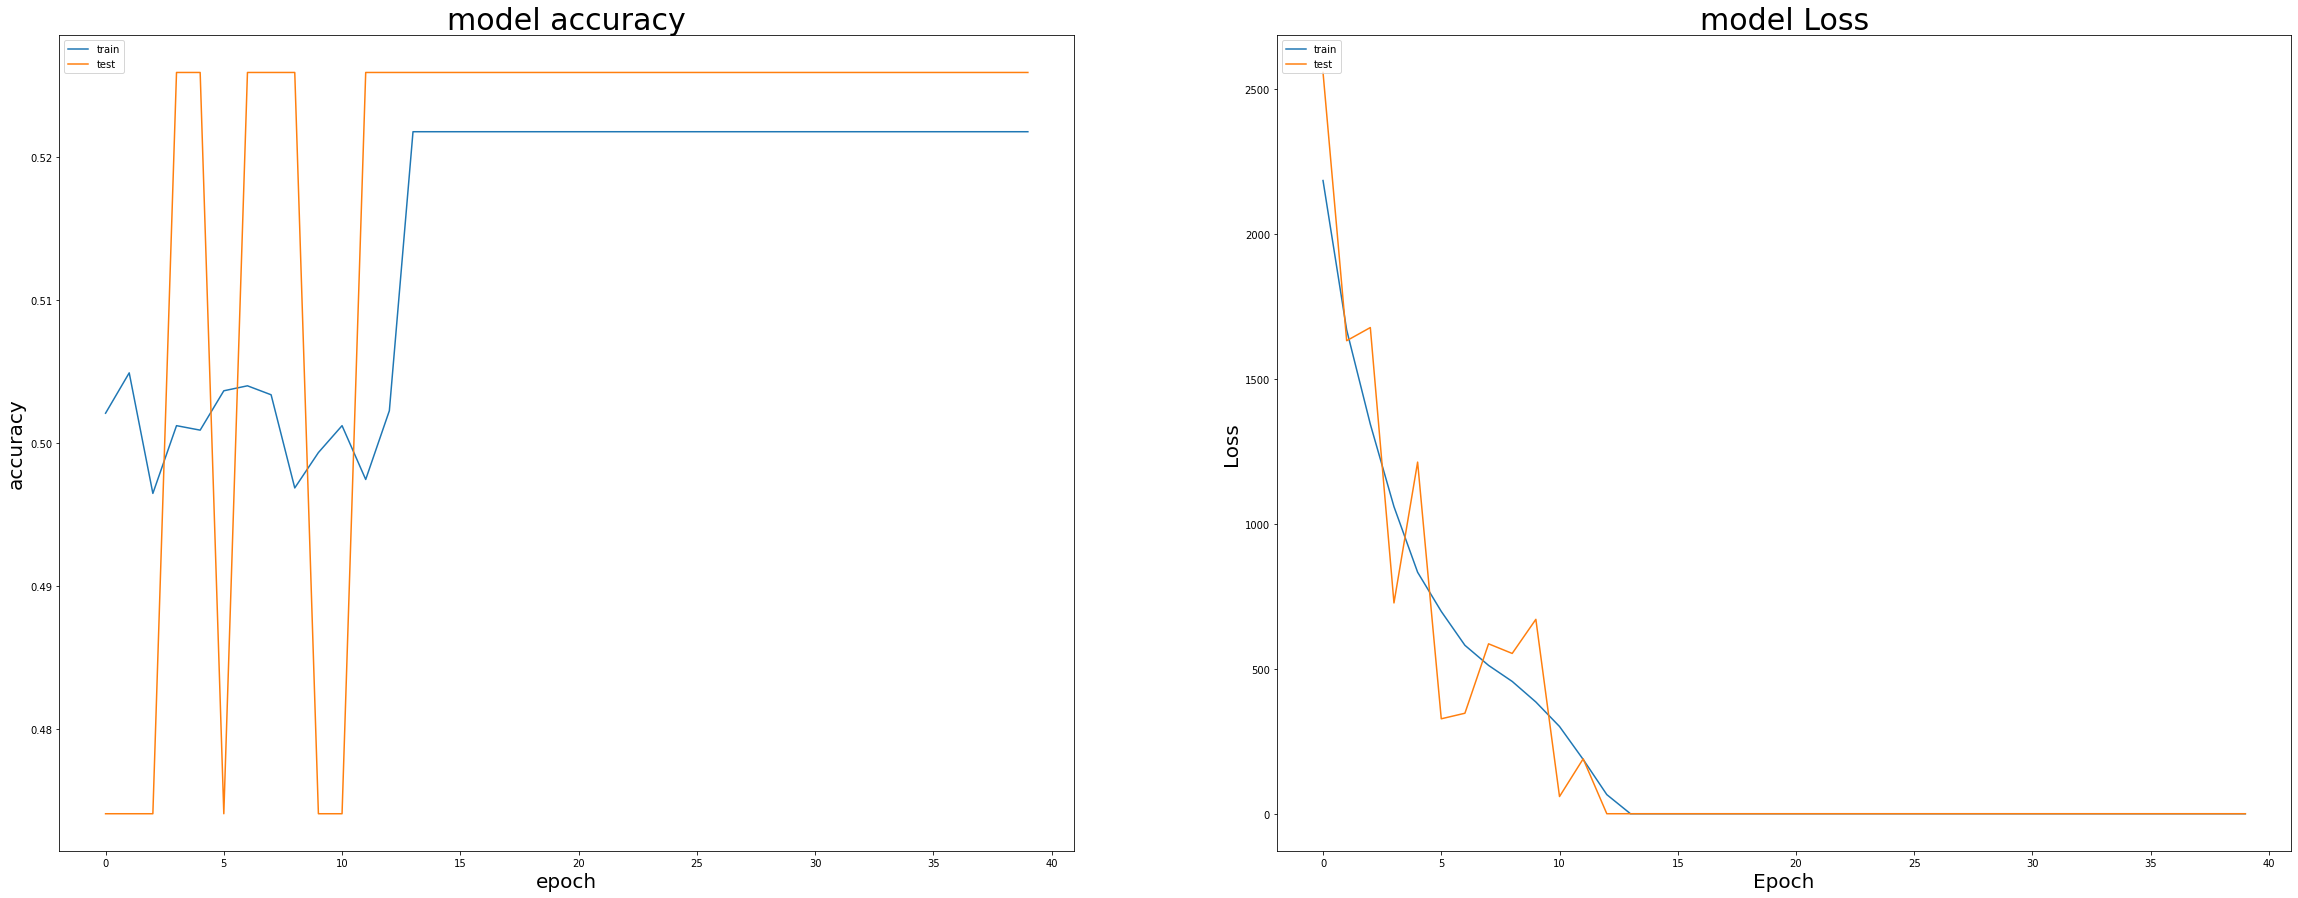

In [91]:
grapPlotter.plot_train_history(model_w2v_simple_dense_text_history)